# 全国大学生数学建模大赛2024年 C题 农作物的种植策略

## 问题一：
### 假定各种农作物未来的预期销售量、种植成本、亩产量和销售价格相对于2023年保持稳定，每季种植的农作物在当季销售。如果某种作物每季的总产量超过相应的预期销售量，超过部分不能正常销售。请针对以下两种情况，分别给出该乡村2024~2030年农作物的最优种植方案，将结果分别填入result1_1.xlsx和result1_2.xlsx中（模板文件见附件3）。

### (1) 超过部分滞销，造成浪费；(2) 超过部分按2023年销售价格的50%降价出售。

In [27]:
# 导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文

# 显示负号
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

 # 读取数据
countryside_nowland = pd.read_excel('题目及附件\附件1.xlsx', sheet_name='乡村的现有耕地')
countryside_nowcrops = pd.read_excel('题目及附件/附件1.xlsx', sheet_name='乡村种植的农作物')
plantcrop2023 = pd.read_excel('题目及附件/附件2.xlsx', sheet_name='2023年的农作物种植情况')
statistics2023 = pd.read_excel('题目及附件/附件2.xlsx', sheet_name='2023年统计的相关数据')

# 如果表格中含有“说明”这一列，就忽略这一列
def drop_explanation_column(df):
    if '说明' in df.columns:
        df = df.drop(columns=['说明'])
    return df

# 删除“说明”列
countryside_nowland = drop_explanation_column(countryside_nowland)
countryside_nowcrops = drop_explanation_column(countryside_nowcrops)
plantcrop2023 = drop_explanation_column(plantcrop2023)
statistics2023 = drop_explanation_column(statistics2023)

# 判断每个数据是否有缺失值
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("没有缺失值")
        return None
    elif missing_values.sum() != 0:
        print("有缺失值")
        return missing_values[missing_values > 0]

# 检查每个数据集的缺失值
print("countryside_nowland", check_missing_values(countryside_nowland))
print("countryside_nowcrops", check_missing_values(countryside_nowcrops))
print("plantcrop2023", check_missing_values(plantcrop2023))
print("statistics2023", check_missing_values(statistics2023))



没有缺失值
countryside_nowland None
没有缺失值
countryside_nowcrops None
有缺失值
plantcrop2023 种植地块    33
dtype: int64
没有缺失值
statistics2023 None


# 首先对数据进行缺失值判断，发现数据不存在缺失值。
## 接下来对数据进行异常值判断

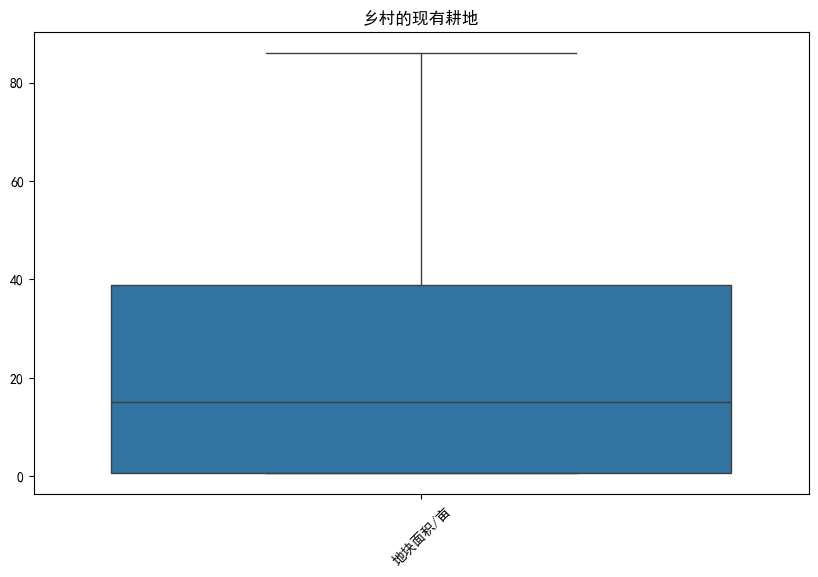

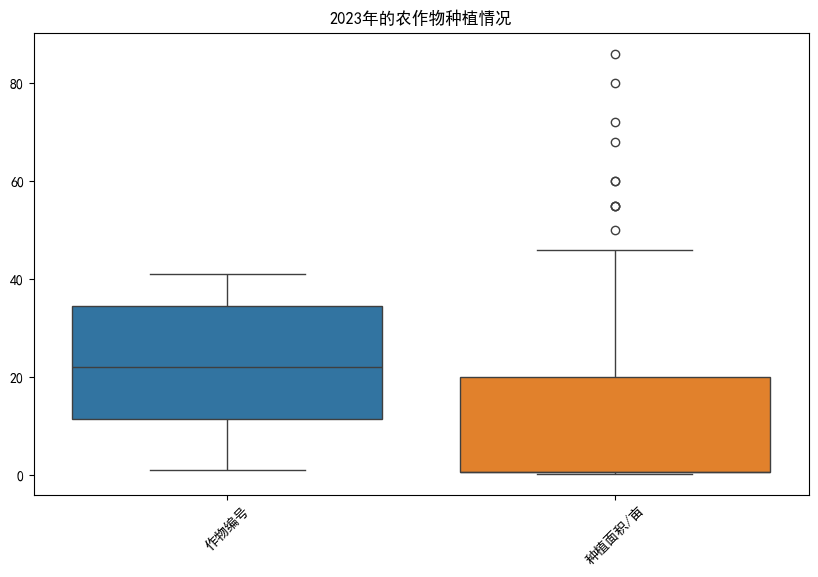

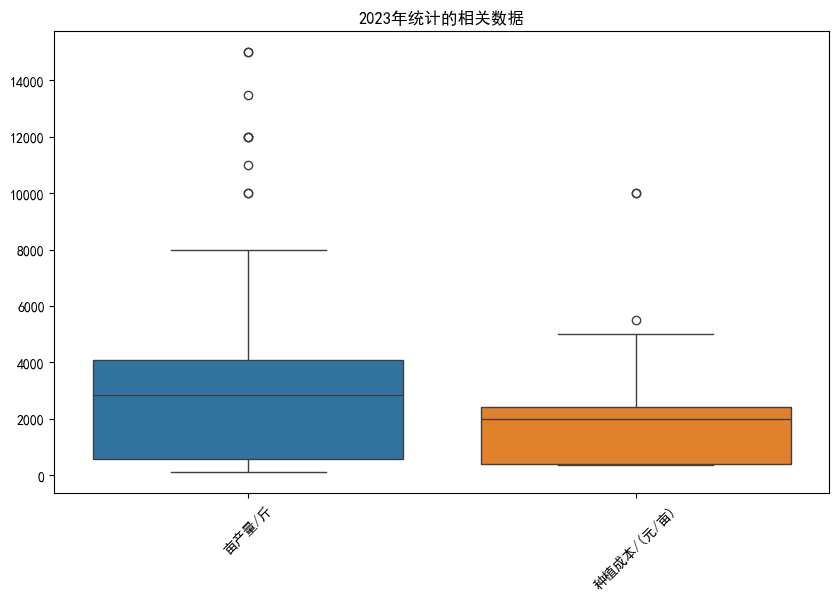

In [28]:
# 判断数据是否存在异常值

# 通过箱型图来判断数据是否存在异常值
def plot_boxplot(df, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
    plt.close() 
# 对statistics2023数据中，只判断亩产量和种植成本两列的异常值
statistics2023 = statistics2023[['亩产量/斤', '种植成本/(元/亩)']]
# 绘制箱型图
plot_boxplot(countryside_nowland, "乡村的现有耕地")
plot_boxplot(plantcrop2023, "2023年的农作物种植情况")
plot_boxplot(statistics2023, "2023年统计的相关数据")


# 经过判断，数据并不存在异常值

## 数据可以存在重复值

- 接下来进行数据的分析和可视化.更直观的分析数据


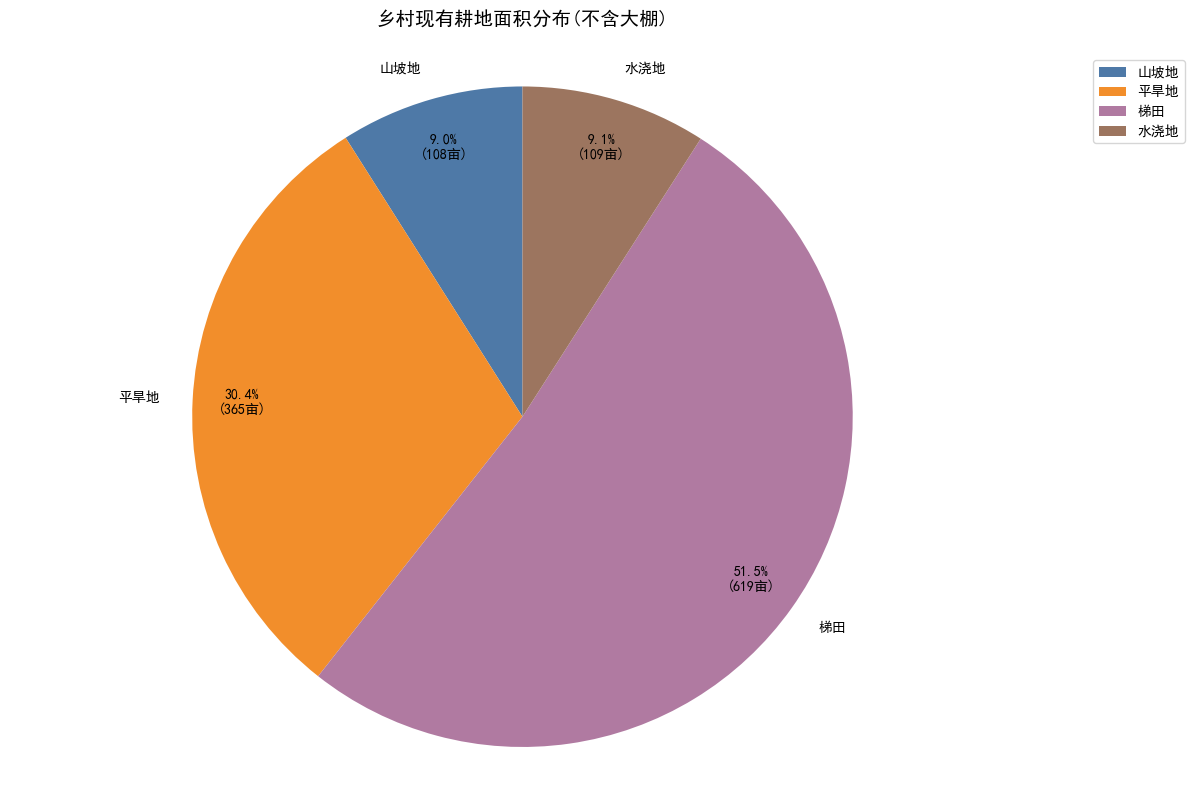


各类型耕地面积统计（不含大棚）：
山坡地: 108.00亩 (9.0%)
平旱地: 365.00亩 (30.4%)
梯田: 619.00亩 (51.5%)
水浇地: 109.00亩 (9.1%)

现有耕地总面积: 1213.00亩


In [29]:
"""

统计没有大棚的耕地面积分布情况

"""
# 计算每种地块类型的面积总和，排除智慧大棚和普通大棚
area_by_type = countryside_nowland[~countryside_nowland['地块类型'].isin(['智慧大棚', '普通大棚 '])].groupby('地块类型')['地块面积/亩'].sum()

# 自定义显示格式函数
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d}亩)'
    return my_autopct

# 设置图形大小
plt.figure(figsize=(12, 8))

# 设置颜色方案，由于移除了两种类型，所以只需要4种颜色
colors = ['#4E79A7', '#F28E2B', '#B07AA1', '#9C755F']

# 绘制饼图
plt.pie(area_by_type.values,
        labels=area_by_type.index,
        colors=colors,
        autopct=make_autopct(area_by_type.values),
        startangle=90,
        pctdistance=0.85,
        labeldistance=1.1)

# 添加标题
plt.title('乡村现有耕地面积分布(不含大棚)', pad=20, fontsize=14)

# 添加图例，并调整位置
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 确保饼图是圆形的
plt.axis('equal')

# 调整布局以确保图例完整显示
plt.tight_layout()

# 保存图片
if not os.path.exists('results'):
    os.makedirs('results')
plt.savefig('results/耕地面积分布饼图_无大棚.png', bbox_inches='tight', dpi=300)

# 显示图片
plt.show()
plt.close()

# 打印具体数值
print("\n各类型耕地面积统计（不含大棚）：")
for type_name, area in area_by_type.items():
    print(f"{type_name}: {area:.2f}亩 ({(area/area_by_type.sum()*100):.1f}%)")

# 统计现有的总面积
total_area = countryside_nowland['地块面积/亩'].sum()
print(f"\n现有耕地总面积: {total_area:.2f}亩")

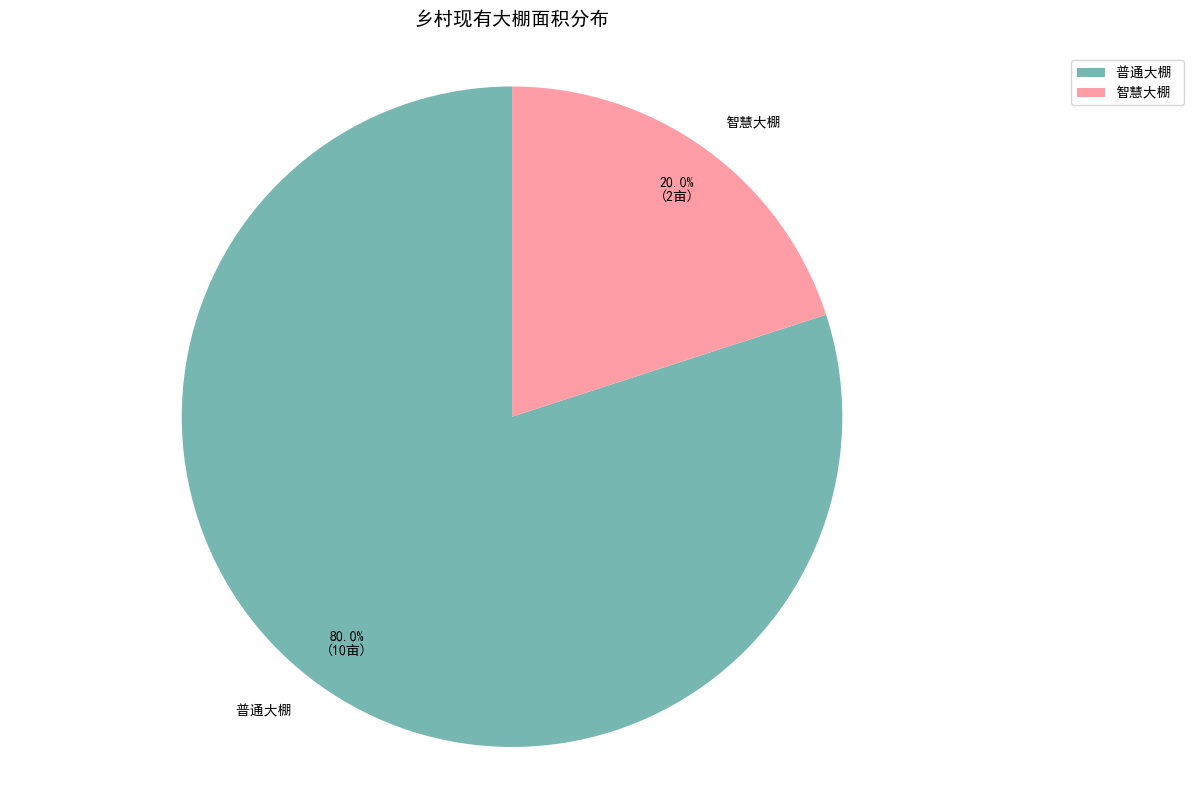


各类型大棚面积统计：
普通大棚 : 9.60亩 (80.0%)
智慧大棚: 2.40亩 (20.0%)

现有大棚总面积: 12.00亩


In [30]:
"""

只统计大棚的分布情况

"""

# 计算智慧大棚和普通大棚的面积总和
area_by_type_greenhouse = countryside_nowland[countryside_nowland['地块类型'].isin(['智慧大棚', '普通大棚 '])].groupby('地块类型')['地块面积/亩'].sum()

# 自定义显示格式函数
def make_autopct_greenhouse(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d}亩)'
    return my_autopct
# 设置图形大小
plt.figure(figsize=(12, 8))
# 设置颜色方案
colors_greenhouse = ['#76B7B2', '#FF9DA7']
# 绘制饼图
plt.pie(area_by_type_greenhouse.values,
        labels=area_by_type_greenhouse.index,
        colors=colors_greenhouse,
        autopct=make_autopct_greenhouse(area_by_type_greenhouse.values),
        startangle=90,
        pctdistance=0.85,
        labeldistance=1.1)
# 添加标题
plt.title('乡村现有大棚面积分布', pad=20, fontsize=14)
# 添加图例，并调整位置
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# 确保饼图是圆形的
plt.axis('equal')
# 调整布局以确保图例完整显示
plt.tight_layout()
# 保存图片
if not os.path.exists('results'):
    os.makedirs('results')
plt.savefig('results/耕地面积分布饼图_大棚.png', bbox_inches='tight', dpi=300)
# 显示图片
plt.show()
plt.close()
# 打印具体数值
print("\n各类型大棚面积统计：")
for type_name, area in area_by_type_greenhouse.items():
    print(f"{type_name}: {area:.2f}亩 ({(area/area_by_type_greenhouse.sum()*100):.1f}%)")

# 统计现有大棚的总面积
total_area_greenhouse = countryside_nowland[countryside_nowland['地块类型'].isin(['智慧大棚', '普通大棚 '])]['地块面积/亩'].sum()
print(f"\n现有大棚总面积: {total_area_greenhouse:.2f}亩")
